# Dask bag

Dask proposes "big data" collections with a small set of high-level primitives like `map`, `filter`, `groupby`, and `join`.  With these common patterns we can often handle computations that are more complex than map, but are still structured.

- Dask-bag excels in processing data that can be represented as a sequence of arbitrary inputs ("messy" data)
- When you encounter a set of data with a format that does not enforce strict structure and datatypes.

**Related Documentation**

*  [Bag Documenation](http://dask.pydata.org/en/latest/bag.html)
*  [Bag API](http://dask.pydata.org/en/latest/bag-api.html)

In [2]:
data = list(range(2,20))
data

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [3]:
import dask.bag as db

b = db.from_sequence(data)

In [4]:
b.compute()  # Gather results back to local process

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [5]:
b.map(lambda x : x//2).compute() # compute length of each element and collect results

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]

In [6]:
from time import sleep

def slow_half( x):
    sleep(1)
    return x // 2

res = b.map(slow_half)
res

dask.bag<slow_ha..., npartitions=18>

In [7]:
%%time
res.compute()

CPU times: user 27.3 ms, sys: 23.8 ms, total: 51 ms
Wall time: 3.05 s


[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]

In [8]:
b.product(b).compute() # Cartesian product of each pair 
# of elements in two sequences (or the same sequence in this case)

[(2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (3, 16),
 (3, 17),
 (3, 18),
 (3, 19),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (4, 16),
 (4, 17),
 (4, 18),
 (4, 19),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (5, 15),
 (5, 16),
 (5, 17),
 (5, 18),
 (5, 19),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 12),
 (6, 13),
 (6, 14),
 (6, 15),
 (6, 16),
 (6, 17),
 (6, 18),
 (6, 19),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7),
 (7, 8),
 (7, 9),
 (7, 10),
 (7, 11),
 (7, 12),
 (7, 13),
 (7, 14),
 (7, 15),
 (7, 16)

Chain operations to construct more complex computations

In [9]:
(b.filter(lambda x: x % 2 > 0)
  .product(b)
  .filter( lambda v : v[0] % v[1] == 0 and v[0] != v[1])
  .compute())

[(9, 3), (15, 3), (15, 5)]

## Daily stock example

Let's use the bag interface to read the json files containing time series.

Each line is a JSON encoded dictionary with the following keys
- timestamp: Day.
- close: Stock value at the end of the day.
- high: Highest value.
- low: Lowest value.
- open: Opening price.

In [10]:
# preparing data
import os  # library to get directory and file paths
import tarfile # this module makes possible to read and write tar archives

def extract_data(name, where):
    datadir = os.path.join(where,name)
    if not os.path.exists(datadir):
       print("Extracting data...")
       tar_path = os.path.join(where, name+'.tgz')
       with tarfile.open(tar_path, mode='r:gz') as data:
          data.extractall(where)
            
extract_data('daily-stock','../data') # this function call will extract json files

In [11]:
%ls ../data/daily-stock/*.json

../data/daily-stock/aet.json   ../data/daily-stock/hpq.json
../data/daily-stock/afl.json   ../data/daily-stock/ibm.json
../data/daily-stock/aig.json   ../data/daily-stock/jbl.json
../data/daily-stock/al.json    ../data/daily-stock/jpm.json
../data/daily-stock/amgn.json  ../data/daily-stock/luv.json
../data/daily-stock/avy.json   ../data/daily-stock/met.json
../data/daily-stock/b.json     ../data/daily-stock/pcg.json
../data/daily-stock/bwa.json   ../data/daily-stock/tgt.json
../data/daily-stock/ge.json    ../data/daily-stock/usb.json
../data/daily-stock/hal.json   ../data/daily-stock/xom.json
../data/daily-stock/hp.json


In [12]:
import dask.bag as db
import json
stocks = db.read_text('../data/daily-stock/*.json')

In [13]:
stocks.npartitions

22

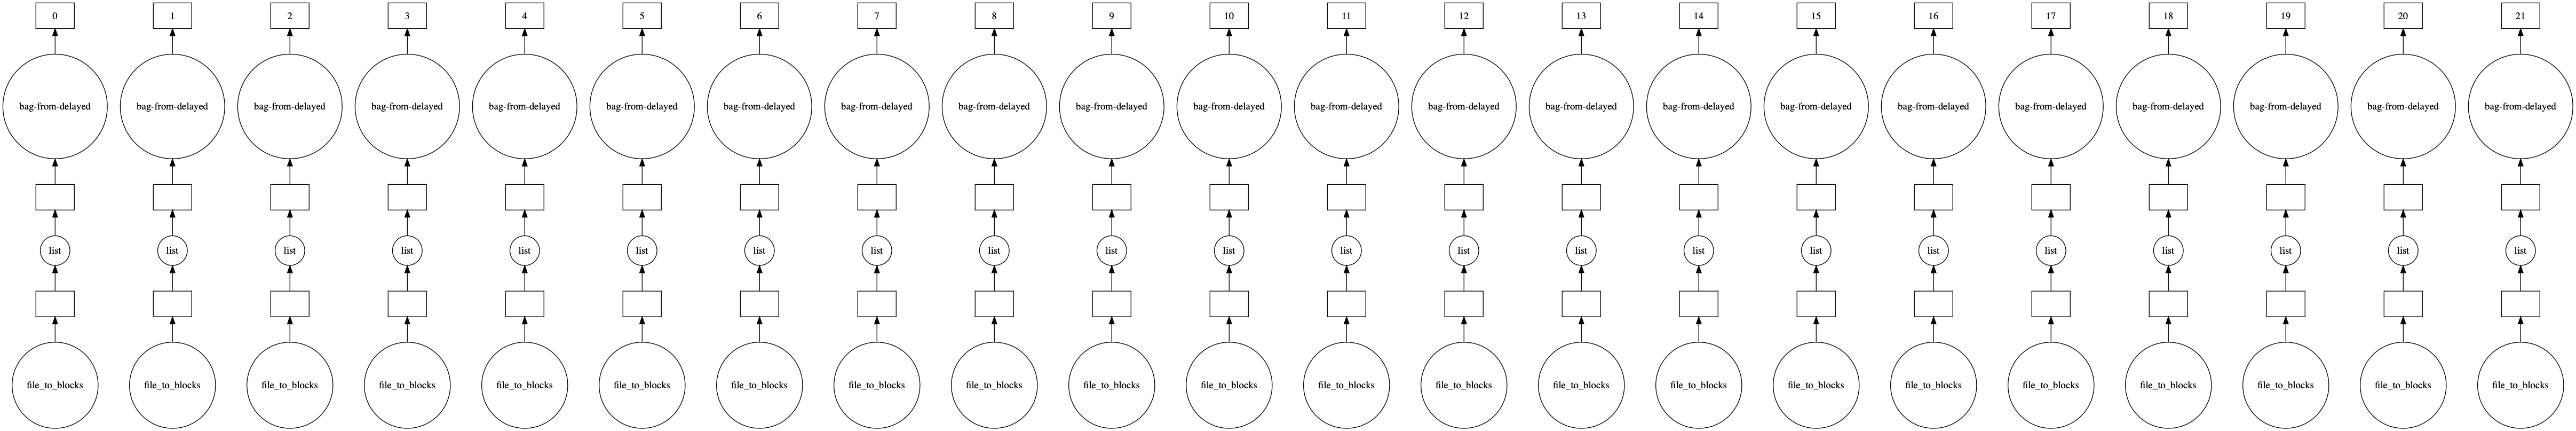

In [14]:
stocks.visualize()

In [15]:
import json
js = stocks.map(json.loads)


In [17]:
import os, sys
from glob import glob
import pandas as pd
import json

here = os.getcwd() # get the current directory
filenames = sorted(glob(os.path.join(here,'..','data', 'daily-stock', '*.json')))
filenames

['/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/aet.json',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/afl.json',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/aig.json',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/al.json',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/amgn.json',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/avy.json',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/b.json',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/bwa.json',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/ge.json',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/hal.json',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/hp.json',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/hpq.json',
 '/Users/navaro/Pych

In [18]:
from tqdm import tqdm_notebook as tqdm
for fn in tqdm(filenames):
    with open(fn) as f:
        data = [json.loads(line) for line in f]
        
    df = pd.DataFrame(data)
    
    out_filename = fn[:-5] + '.h5'
    df.to_hdf(out_filename, '/data')

In [19]:
filenames = sorted(glob(os.path.join(here,'..','data', 'daily-stock', '*.h5')))
filenames

['/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/aet.h5',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/afl.h5',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/aig.h5',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/al.h5',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/amgn.h5',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/avy.h5',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/b.h5',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/bwa.h5',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/ge.h5',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/hal.h5',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/hp.h5',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/hpq.h5',
 '/Users/navaro/PycharmProjects/big-data/not

### Serial version

In [20]:
series = {}
for fn in filenames:   # Simple map over filenames
    series[fn] = pd.read_hdf(fn)['close']

results = {}

for a in filenames:    # Doubly nested loop over the same collection
    for b in filenames:  
        if a != b:     # Filter out bad elements
            results[a, b] = series[a].corr(series[b])  # Apply function

((a, b), corr) = max(results.items(), key=lambda kv: kv[1])  # Reduction

In [21]:
a, b, corr

('/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/aet.h5',
 '/Users/navaro/PycharmProjects/big-data/notebooks/../data/daily-stock/luv.h5',
 0.9413176064560878)

## Dask.bag methods

We can construct most of the above computation with the following dask.bag methods:

*  `collection.map(function)`: apply function to each element in collection
*  `collection.product(collection)`: Create new collection with every pair of inputs
*  `collection.filter(predicate)`: Keep only elements of colleciton that match the predicate function
*  `collection.max()`: Compute maximum element


In [22]:
%%time

import dask.bag as db

b = db.from_sequence(filenames)
series = b.map(lambda fn: pd.read_hdf(fn)['close'])

corr = (series.product(series)
              .filter(lambda ab: not (ab[0] == ab[1]).all())
              .map(lambda ab: ab[0].corr(ab[1])).max())

CPU times: user 4.25 ms, sys: 5.22 ms, total: 9.47 ms
Wall time: 9.44 ms


In [32]:
%%time

result = corr.compute()

CPU times: user 3.69 s, sys: 1.86 s, total: 5.55 s
Wall time: 6.06 s


In [33]:
result

0.9413176064560876

### Wordcount with Dask bag

In [34]:
import lorem

for i in range(20):
    with open(f"sample{i:02d}.txt","w") as f:
        f.write(lorem.text())

In [35]:
%ls *.txt

sample00.txt  sample04.txt  sample08.txt  sample12.txt  sample16.txt
sample01.txt  sample05.txt  sample09.txt  sample13.txt  sample17.txt
sample02.txt  sample06.txt  sample10.txt  sample14.txt  sample18.txt
sample03.txt  sample07.txt  sample11.txt  sample15.txt  sample19.txt


In [36]:
import dask.bag as db
import glob
b = db.read_text(glob.glob('sample*.txt'))

wordcount = (b.str.replace(".","")  # remve dots
             .str.lower()           # lower text
             .str.strip()           # remove \n and trailing spaces
             .str.split()           # split into words
             .flatten()             # chain all words lists
             .frequencies()         # compute occurences
             .topk(10, lambda x: x[1])) # sort and return top 10 words


wordcount.compute() # Run all tasks and return result

[('modi', 170),
 ('amet', 168),
 ('numquam', 167),
 ('sed', 161),
 ('sit', 159),
 ('porro', 158),
 ('tempora', 158),
 ('quaerat', 157),
 ('dolor', 157),
 ('velit', 157)]

## Genome example
We will use a Dask bag to calculate the frequencies of sequences of five bases, and then sort the sequences into descending order ranked by their frequency.

- First we will define some functions to split the bases into sequences of a certain size

### Exercise 9.1

- Implement a function `group_characters(line, n=5)` to group `n` characters together and create a sequence of 5 bases. `line` is a text line in genome.txt file.
    
- Implement `group_and_split(line)`
```py
>>> group_and_split('abcdefghijklmno')
['abcde', 'fghij', 'klmno']
```

- Use the dask bag to compute  the frequencies of sequences of five bases.

### Exercise 9.2

The [FASTA](http://www.cbs.dtu.dk/services/NetGene2/fasta.php) file format is used to write several genome sequences.

- Create a function that can read a [FASTA file](../data/nucleotide-sample.txt) and compute the frequencies for n = 5 of a given sequence.

### Exercise 9.3

Write a program that uses the function implemented above to read several FASTA files stored in a Dask bag.

# Some remarks about bag

*  Higher level dask collections include functions for common patterns
*  Move data to collection, construct lazy computation, trigger at the end
*  Use Dask.bag (`product + map`) to handle nested for loop

Bags have the following known limitations

1.  Bag operations tend to be slower than array/dataframe computations in the
    same way that Python tends to be slower than NumPy/Pandas
2.  ``Bag.groupby`` is slow.  You should try to use ``Bag.foldby`` if possible.
    
3. Check the [API](http://dask.pydata.org/en/latest/bag-api.html) 

4. `dask.dataframe` can be faster than `dask.bag`.  But sometimes it is easier to load and clean messy data with a bag. We will see later how to transform a bag into a `dask.dataframe` with the [to_dataframe](http://dask.pydata.org/en/latest/bag-api.html#dask.bag.Bag.to_dataframe) method.